In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('cane.csv')
data.head()

,Unnamed: 0,n,r,x,var,block
0,1,87,76,19,1,A
1,2,119,8,14,2,A
2,3,94,74,9,3,A
3,4,95,11,12,4,A
4,5,134,0,12,5,A


In [3]:
X = data['n'].values
Y = data['r'].values
print(X)

[ 87 119  94  95 134  92 118  70 128  85  77  29 109 209  89 171 243 109
  66 177 124 159  68 136  86  75 100 147  49 111 134 179 120 169  45 105
  65 192  92 212  79 119  97 129  72  70 125 105 104 115 195 111 131 108
 121  74 111 120 231 113 131 222 109 161 112 121 191  85 143  82 105 140
 167  38  81 162 243  66 120 133 119  92 162 131 108  46 147 130 148 100
  73 130  71 104 195  99  63  85  59 113  63  50 102 223  91 169 130 103
  98 173 152 137  33 123  88  99 153 154  78  80 161 184  69 141 113 132
  63 161 111  78  71 118  84 175 143  59 177  48 165 150 135  97  75  51
 135 102  57  58 157  94 172 105 147  94 106 137 243 137 104 116 102 151
 113  67 111 132 220  67 146 110  93  79 167 144 182  61 154  98 129 130]


In [8]:
N = len(X)
print(N)

180


In [19]:
rmse = 0
for i in range(N):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/N)
print(rmse)

[22.98818037]


In [21]:
ss_tot = 0
ss_res = 0
for i in range(N):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

[0.11476593]


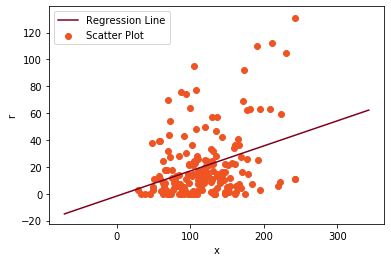

In [24]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 10)
y = b0 + (b1 * x)

# Ploting Line
plt.plot(x, y, color='#800020', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('x')
plt.ylabel('r')
plt.legend()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
X = X.reshape((N, 1))
reg = LinearRegression()
reg = reg.fit(X, Y)

In [15]:
mean_x = np.mean(X)
print(mean_x)
mean_y = np.mean(Y)
print(mean_y)
numer = 0
denom = 0
for i in range(N):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)
print(b1, b0)

118.14444444444445
20.255555555555556
[0.18683462] [-1.81791738]


In [16]:
Y_pred = b0 + b1 * X
mse = mean_squared_error(Y, Y_pred)
r2_score = reg.score(X, Y)

In [17]:
print(np.sqrt(mse))
print(r2_score)

22.98818037005738
0.11476592569675448


In [25]:
vif = 1/(1 - r2_score)
print(vif)

1.1296447222584434
